## Source of data 
Source: [https://archive.ics.uci.edu/ml/datasets/Wholesale+customers](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers)

Margarida G. M. S. Cardoso, margarida.cardoso '@' iscte.pt, ISCTE-IUL, Lisbon, Portugal

Data Set Information:

Provide all relevant information about your data set.

Attribute Information:

1) FRESH: annual spending (m.u.) on fresh products (Continuous);
2) MILK: annual spending (m.u.) on milk products (Continuous);
3) GROCERY: annual spending (m.u.) on grocery products (Continuous);
4) FROZEN: annual spending (m.u.) on frozen products (Continuous)
5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
6) DELICATESSEN: annual spending (m.u.) on delicatessen products (Continuous);
7) CHANNEL: customers Channel - Horeca (Hotel/Restaurant/Café) or Retail channel (Nominal)
8) REGION: customers Region Lisnon, Oporto or Other (Nominal)


## Exploratry Data Analysis 

Here, we will perform exploratory data analysis on the dataset to understand the data better.

In [10]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv(filepath_or_buffer='wholesome_customers_data.csv')

In [12]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


No, data is missing! Let's explore some relationsip between continuous varaibles

In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


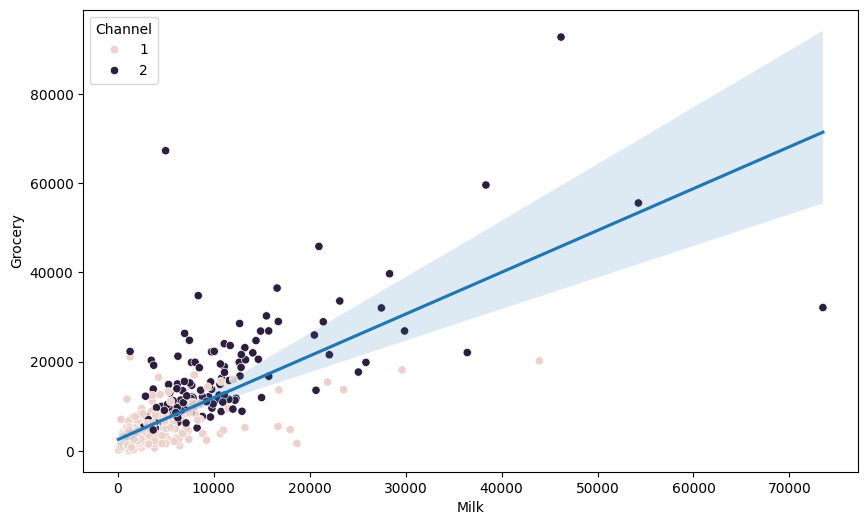

In [15]:
import matplotlib.pyplot as plt

fig_milk_vs_grocery , ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(data=df, x='Milk', y='Grocery', hue='Channel', ax=ax)

# Adding a regression line
sns.regplot(data=df, x='Milk', y='Grocery', scatter=False, ax=ax)

plt.show()

There seems to be is a linear relationship with some outlier in the data.

Let's see the distribution of the milk spending and the channel of the customers.

<Axes: xlabel='Milk', ylabel='Count'>

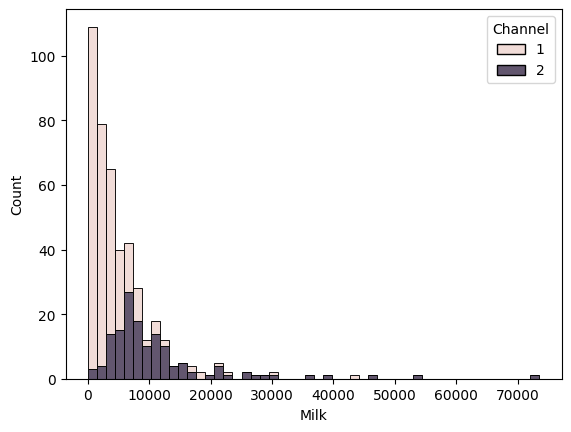

In [16]:
sns.histplot(data=df, x='Milk', hue='Channel', multiple='stack')

There is a clear heavy spending on milk products by the customers in the Retail channel compared to the Horeca channel. First channel looks like a exponential distribution, while the second channel looks like a normal distribution.

## Data Overall Relationship

Let's see the overall relashionship between the features in the dataset.

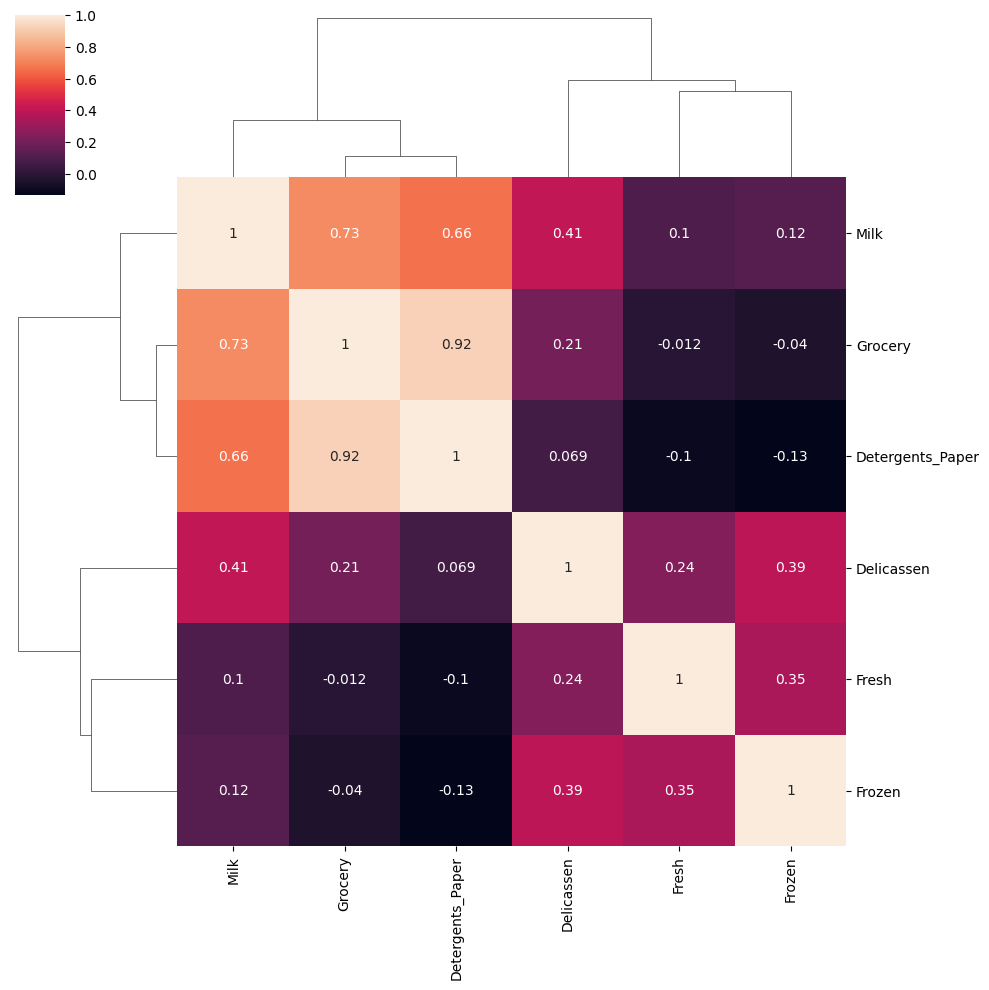

In [22]:
sns.clustermap(data=df.iloc[:,2:].corr(), annot=True);


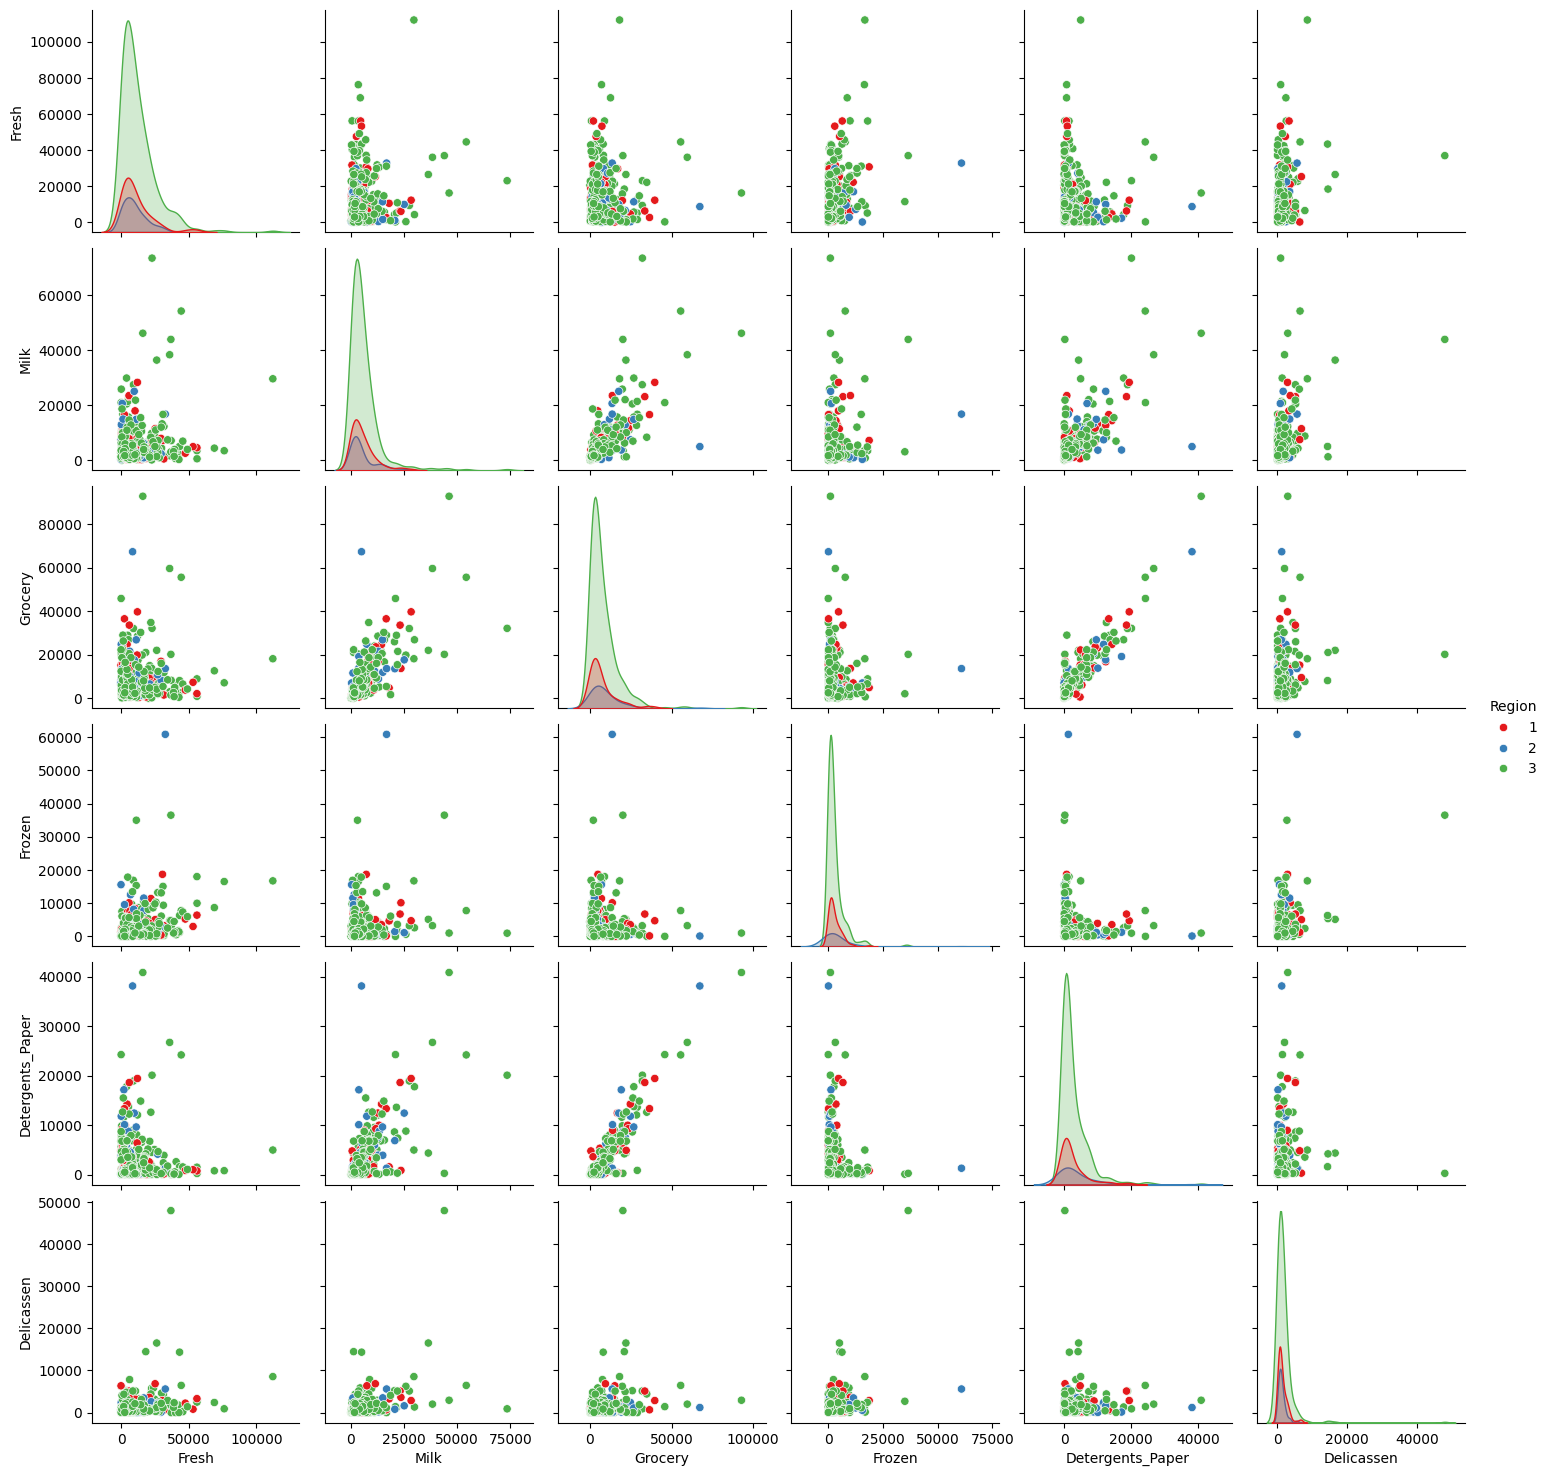

In [23]:
sns.pairplot(data=df , hue='Region', vars=df.columns[2:], palette='Set1')

## Data Preprocessing 

Let's preprocess the data before we apply the outlier detection algorithm.

In [26]:
from sklearn.preprocessing import StandardScaler

X = df
scaler = StandardScaler()

X_scaled  = scaler.fit_transform(X=X)

In [30]:
# Get esp vs outlier plot 
def scan_dbscan_epsilon(scaled_X , minsample: int = 5 , eps = np.linspace(0.001, 3, 100), hline: float =1):
    """Scans for a point of inflexion for DBSCAN. Plots eps  vs perct of outliner.

    Plots eps vs outlier % for dbscan. 

    Parameters
    ----------
    scaled_X
        Scaled feature data.
    minsample
        The value of minsample is 5 by default. Use dim(feature) * 2 for good performance.
    eps, optional
        Range of eps value to search, by default np.linspace(0.001, 3, 100)
    hline, optional
        generates a horizontal like at a given outlier percentage, by default 1
    """    """"""   
    
    from sklearn.cluster import DBSCAN
    outlier = []
    for epsilon in eps:
        model = DBSCAN(eps=epsilon , min_samples= minsample, n_jobs=-1)
        model.fit(X_scaled)
        outlier.append(np.sum(model.labels_  == -1))
    outlier_perct = np.array(outlier) * 100/len(model.labels_)

    plt.figure(figsize=(10,6), dpi=150)
    plt.grid(visible=True, which='both', axis='both')
    plt.plot(eps, outlier_perct)
    plt.ylabel('outlier percentage')
    plt.xlabel('epsilon')
    plt.hlines(y=hline, xmax=eps[-1], xmin=eps[0], linestyles='--', label= '1% Outlier', colors='green')
    plt.show()


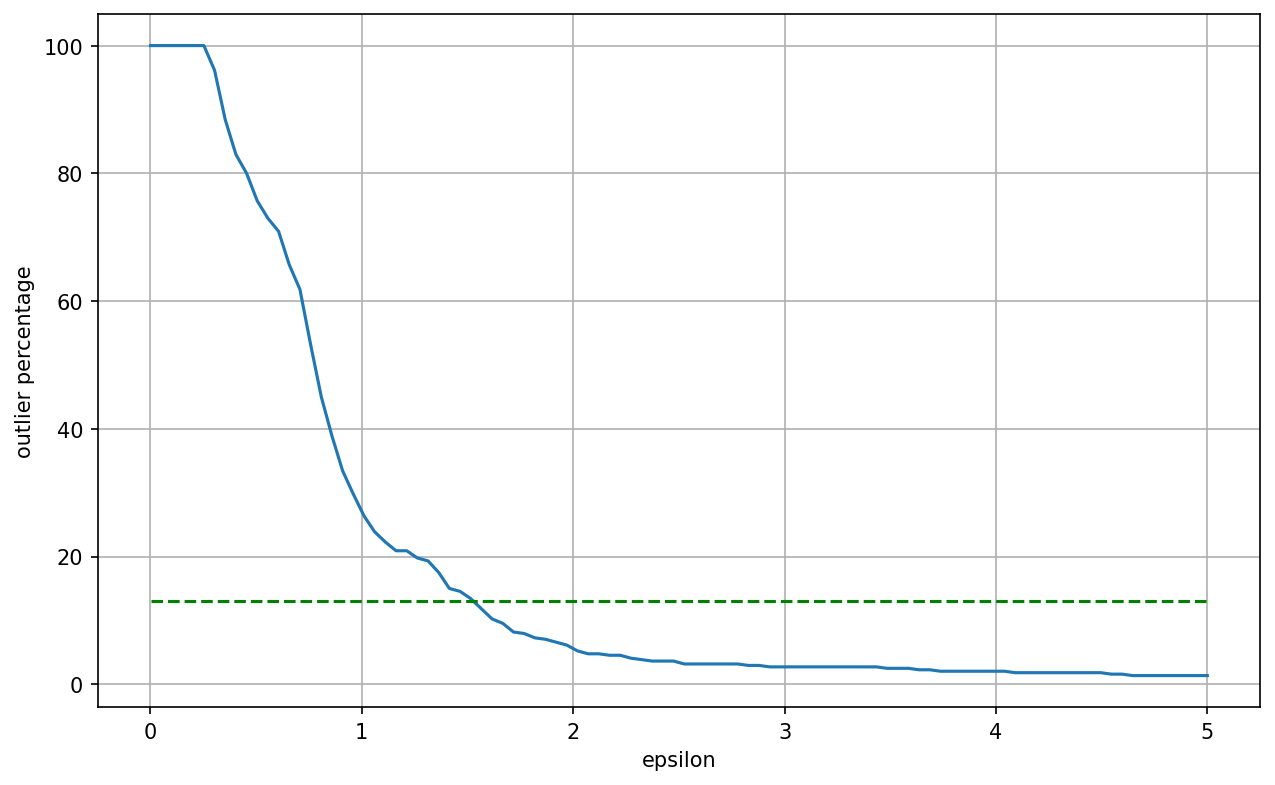

In [31]:
scan_dbscan_epsilon(X_scaled, 2* len(df.columns), eps=np.linspace(0.001, 5, 100) ,  hline=13)

Looks like outliers settles down an esp = 2. Let's retrain the model to account this.

In [32]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=2, min_samples=2 * len(df.columns))

In [33]:
model.fit(X_scaled)

DBSCAN(eps=2, min_samples=16)

How many cluster points did the DBSCAN discover?

In [34]:
set(model.labels_)

{-1, 0, 1}

Seems like 2 clusters were discovered

## Cluster Interpretation

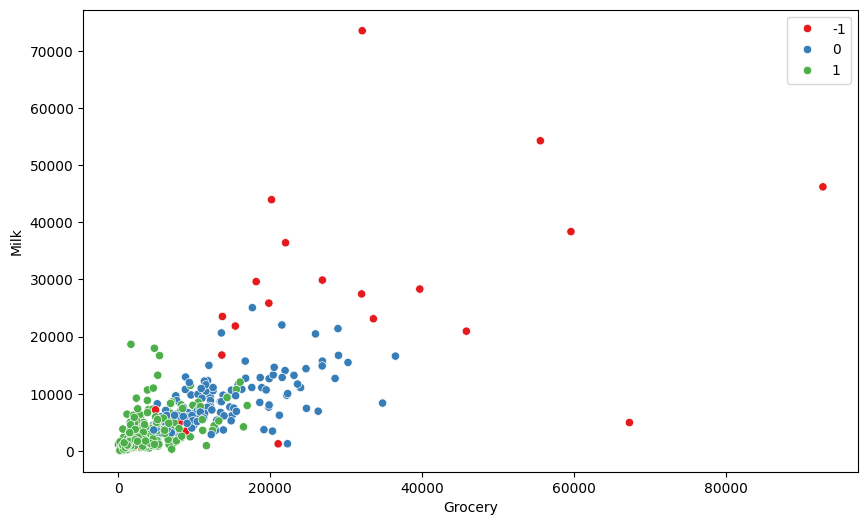

In [45]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=df, x='Grocery', y='Milk', hue=model.labels_, palette='Set1', ax=ax)


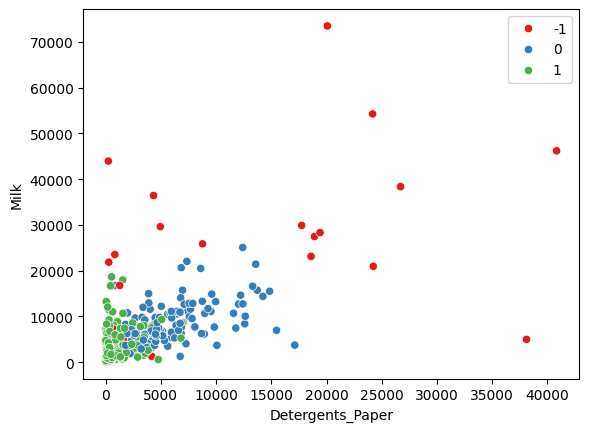

In [37]:
sns.scatterplot(data=df, x='Detergents_Paper', y='Milk', hue=model.labels_, palette='Set1');

In [38]:
df['Lables'] = model.labels_

Let's see the statistical difference between the cluster.

In [46]:
mean_dist_over_lable = df.groupby(by='Lables').mean().iloc[:,2:]

In [47]:
from sklearn.preprocessing import MinMaxScaler

mean_dist_over_lable_normalize = MinMaxScaler().fit_transform(mean_dist_over_lable)
mean_dist_over_lable_normalize = pd.DataFrame(data=mean_dist_over_lable_normalize , index=mean_dist_over_lable.index, columns=mean_dist_over_lable.columns)

Let's see how other discovered cluster feature compares in the dataset compared to the outliers.

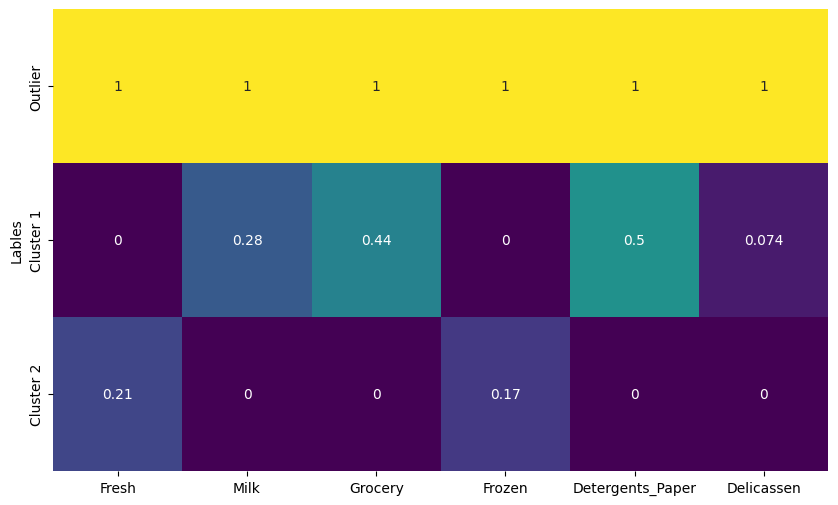

In [57]:
fig, ax = plt.subplots(figsize=(10,6))

sns.heatmap(data=mean_dist_over_lable_normalize, annot=True, cmap='viridis', cbar=False, ax=ax)

# Change the x-axis labels to cluster 1, cluster 2, outlier
ax.set_yticklabels(['Outlier', 'Cluster 1', 'Cluster 2'])

# Save the plot
plt.savefig('cluster_feature_heatmap.png')
